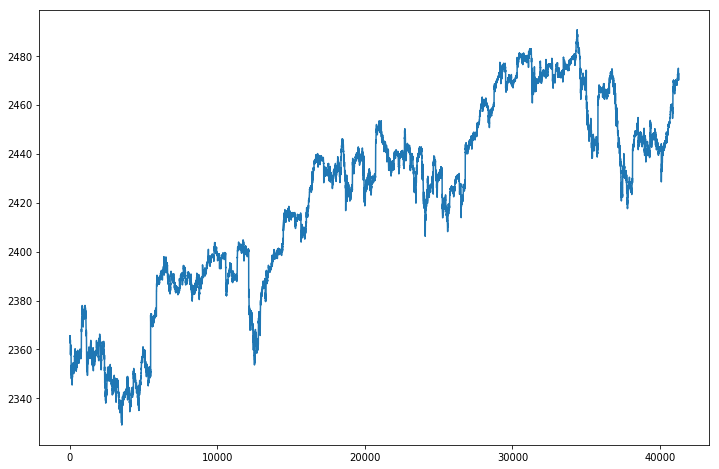

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time

"""DATA IMPORT AND SETUP"""
data = pd.read_csv('data_stocks.csv')
SP500 = data['SP500']
plt.figure(figsize=(12,8))
plt.plot(SP500)

Stock_Input_orig = []
for i in range(len(SP500)-550):
    Stock_Input_orig.append(SP500[i:i+500])
Stock_Input = np.array(Stock_Input_orig)
X = Stock_Input

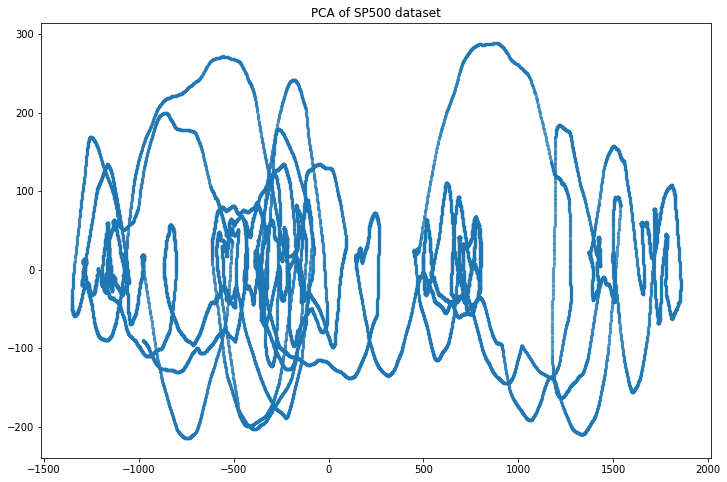

In [299]:
from sklearn.decomposition import PCA

"""PCA PRINCIPAL COMPONENT ANALYSIS"""
pca = PCA(n_components=5)
X_pca = pca.fit(X).transform(X)

plt.figure(figsize=(12,8))
plt.scatter(X_pca[:,0], X_pca[:, 1], marker='.', lw=0.3, alpha=0.5)
plt.title('PCA of SP500 dataset')
plt.show()

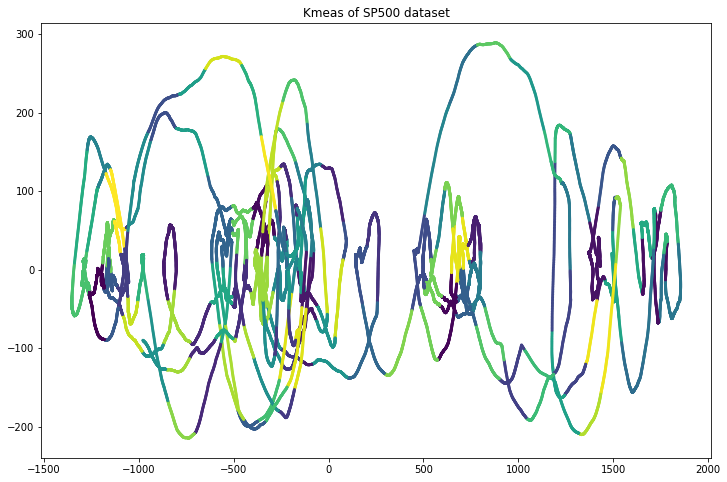

In [300]:
from sklearn.cluster import KMeans

"""K_MEANS CLUSTER"""
y_pred = KMeans(n_clusters=40).fit_predict(X_pca)

plt.figure(figsize=(12,8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, marker='.', lw=0)
plt.title("Kmeas of SP500 dataset")
plt.show()

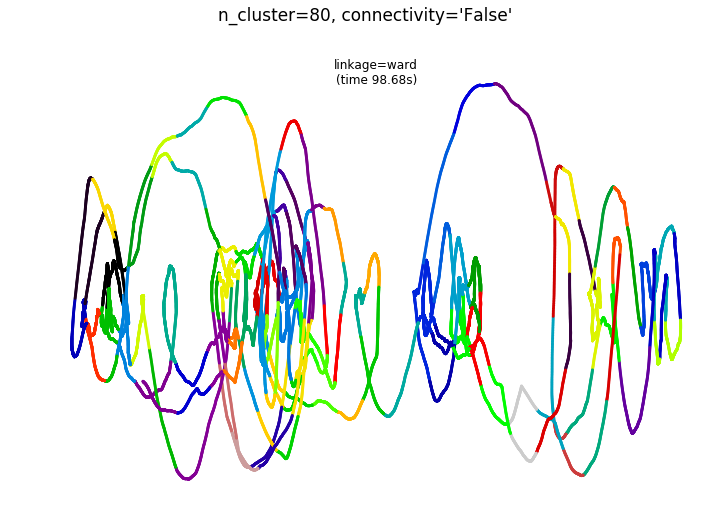

In [303]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

"""AGGLOMERATIVE CLUSTERING"""
knn_graph = kneighbors_graph(X_pca, 20, include_self=False)

model = AgglomerativeClustering(linkage='ward', connectivity=None, n_clusters=40)
t0 = time.time()
model.fit(X_pca)

elapsed_time = time.time() - t0

plt.figure(figsize=(12, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=model.labels_, cmap=plt.cm.nipy_spectral, marker='.', lw=0)
plt.title('linkage=%s\n(time %.2fs)' % ('ward', elapsed_time), fontdict=dict(verticalalignment='top'))
plt.axis('off')
plt.suptitle('n_cluster=%i, connectivity=%r' % (40, 'False'), size=17)

plt.show()

In [304]:
"""RESULT OF CLUSTERING"""
unique, counts = np.unique(model.labels_, return_counts=True)
print(len(model.labels_))
print(dict(zip(unique, counts)))
plt.plot(SP500[5800:6300])
plt.plot(SP500[13000:13500])

40716
{0: 922, 1: 412, 2: 231, 3: 609, 4: 164, 5: 583, 6: 524, 7: 178, 8: 777, 9: 268, 10: 400, 11: 333, 12: 925, 13: 861, 14: 561, 15: 536, 16: 157, 17: 1691, 18: 522, 19: 373, 20: 1311, 21: 1152, 22: 515, 23: 940, 24: 488, 25: 1198, 26: 174, 27: 564, 28: 265, 29: 277, 30: 889, 31: 703, 32: 315, 33: 810, 34: 123, 35: 313, 36: 953, 37: 141, 38: 494, 39: 143, 40: 1878, 41: 409, 42: 558, 43: 628, 44: 117, 45: 409, 46: 1096, 47: 306, 48: 799, 49: 432, 50: 367, 51: 444, 52: 218, 53: 538, 54: 866, 55: 1196, 56: 295, 57: 433, 58: 255, 59: 415, 60: 108, 61: 165, 62: 350, 63: 131, 64: 640, 65: 353, 66: 653, 67: 207, 68: 891, 69: 111, 70: 591, 71: 163, 72: 111, 73: 754, 74: 65, 75: 151, 76: 176, 77: 147, 78: 208, 79: 287}


In [305]:
"""SETUP DESIRED OUTPUT"""
ModelType = model.labels_
ModelType = y_pred
N = len(ModelType)
DesOut = np.zeros((N, 40))
for i in range(N):
    y = np.zeros((1,40))
    y[0][ModelType[i]] = 1
    DesOut[i] = y[0]
    
"""SETUP INPUT"""
"""
XX = np.zeros((X.shape))

for i in range(len(X)):
    XX[i][0] == 0
    for j in range(len(X[i])-1):
        if X[i][j+1] - X[i][j] > 0:
            XX[i][j+1] = 1
        elif X[i][j+1] - X[i][j] < 0:
            XX[i][j+1] = -1
        else:
            XX[i][j+1] = 0
X = XX
"""
InPat = (X - (np.amin(X)))/(np.amax(X) - np.amin(X))

In [306]:
"""ALGORITHM SETUP"""
"""RULE SETUP"""
a = 0.1   ###set the learning rate
tol = 1000
nIts = 100000     ###set the maximum number of allowed iterations
nPat,nIn = InPat.shape
nPat,nOut = DesOut.shape
V = np.random.rand(nOut, nIn)*2 - 1   ###set initially random connectivity matrix
maxErr=10

In [307]:
from random import *
import math

"""TRAINING CONNECTIVITY MATRIX"""
for i in range(nIts):
    pIndx = math.ceil(uniform(0,1)*nPat)    #choose pattern pair at random
    d = np.array([DesOut[pIndx-1]]).T       #set desired output d to chosen output
    x = np.array([InPat[pIndx-1]]).T        #set input x to chosen input pattern
    q = np.dot(V, x)                        #find the weighted sum q of the inputs
    y = 1/(1+np.power(math.e, -q))          #squash that to compute the output y
    dy = np.multiply(y, (1-y))              #compute the derivative of the squashing function
    e = d - y                               #find the error e for the chosen input
    g = np.multiply(e, dy)                  #find output error signal g
    deltaV = a*np.dot(g, x.T)               #compute delta rule weight update
    V = V + deltaV                          #apply the weight update
    if i%10 == 0:                           #after several updates check maximum error
        Q = (np.dot(V, InPat.T)).T          #compute the weighted input sum for all patterns
        Out = 1/(1+np.power(math.e, -Q))    #squash to compute output for all patterns
        maxErr=sum(sum(abs(DesOut - Out)))  #find max error over all patterns end % end the check
    if maxErr < tol:                        #break if max error is below tolerance end % end learning loop
        break

In [ ]:
"""CALCULATE THE ACCURACY"""

dd = []
for k in range(len(Out)):
    maxx_d = max(Out[k])
    for i, j in enumerate(Out[k]):
        if j == maxx_d:
            dd.append(i)
            
cc = []
for l in range(len(DesOut)):
    maxx_c = max(DesOut[l])
    for i, j in enumerate(DesOut[l]):
        if j == maxx_c:
            cc.append(i)

NN = len(DesOut)
calc = 0
for i in range(NN):
    if dd[i] == cc[i]:
        calc = calc + 1

accuracy = calc/NN

In [10]:
print(accuracy)

0.21613125061400923


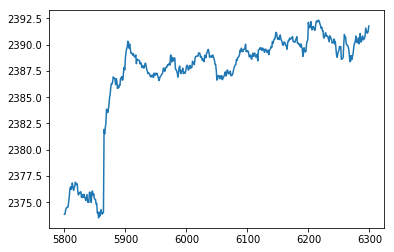

In [277]:
plt.plot(SP500[5800:6300])

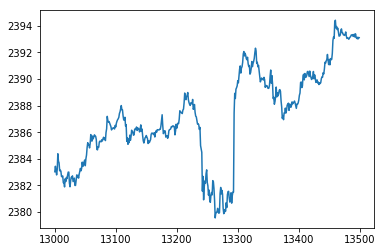

In [3]:
plt.plot(SP500[13000:13500])